**This Notebook will mainly be used for the Coursera IBM Applied Data Science Capstone Project**

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import itertools

In [2]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [3]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.tree import DecisionTreeClassifier
#from sklearn.externals.six import StringIO
#from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_text
#import graphviz 

In [4]:
#kern='linear'
#kern='rbf'
#kern='poly'
kern='sigmoid'

In [5]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [6]:
#!pip install --upgrade --user scikit-learn
#!pip install six

In [7]:
df = pd.read_csv("Data-Collisions.csv")

# take a look at the dataset
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [8]:
print(df.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


Drop columns with descriptive data that will not likely contribute to predictive value of model.  This list will need to be reviewed after first round of results.

In [9]:
df.drop(['OBJECTID'], axis = 1, inplace = True)
df.drop(['INCKEY'], axis = 1, inplace = True)
df.drop(['COLDETKEY'], axis = 1, inplace = True)
df.drop(['REPORTNO'], axis = 1, inplace = True)
df.drop(['STATUS'], axis = 1, inplace = True)
df.drop(['INTKEY'], axis = 1, inplace = True)
df.drop(['LOCATION'], axis = 1, inplace = True)
df.drop(['EXCEPTRSNCODE'], axis = 1, inplace = True)
df.drop(['EXCEPTRSNDESC'], axis = 1, inplace = True)
df.drop(['SEVERITYCODE.1'], axis = 1, inplace = True)
df.drop(['SEVERITYDESC'], axis = 1, inplace = True)
df.drop(['VEHCOUNT'], axis = 1, inplace = True)
df.drop(['INCDATE'], axis = 1, inplace = True)
df.drop(['SDOT_COLCODE'], axis = 1, inplace = True)
df.drop(['SDOT_COLDESC'], axis = 1, inplace = True)
df.drop(['PEDROWNOTGRNT'], axis = 1, inplace = True)
df.drop(['SDOTCOLNUM'], axis = 1, inplace = True)
df.drop(['ST_COLCODE'], axis = 1, inplace = True)
df.drop(['ST_COLDESC'], axis = 1, inplace = True)
df.drop(['SEGLANEKEY'], axis = 1, inplace = True)
df.drop(['CROSSWALKKEY'], axis = 1, inplace = True)
df.drop(['HITPARKEDCAR'], axis = 1, inplace = True)

In [10]:
print(df.columns)
print(df.shape)
print(df.dtypes)
print(df.describe)

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING'],
      dtype='object')
(194673, 16)
SEVERITYCODE        int64
X                 float64
Y                 float64
ADDRTYPE           object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
INCDTTM            object
JUNCTIONTYPE       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
dtype: object
<bound method NDFrame.describe of         SEVERITYCODE           X          Y      ADDRTYPE COLLISIONTYPE  \
0                  2 -122.323148  47.703140  Intersection        Angles   
1                  1 -122.347294  47.647172         Block     Sideswipe   
2                  1 -122.334540  47.607871        

In [11]:
df.describe(include=['object'])

,ADDRTYPE,COLLISIONTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
count,192747,189769,194673,188344,29805,189789,189592,189661,189503,9333
unique,3,10,162058,7,1,4,11,9,9,1
top,Block,Parked Car,11/2/2006,Mid-Block (not related to intersection),Y,N,Clear,Dry,Daylight,Y
freq,126926,47987,96,89800,29805,100274,111135,124510,116137,9333


## GET RID OF NaN Rows: See Data Wrangling in Data Analysis

<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

## Need to convert important features to numbers ! ##
- Weather
- Road Conditions
- Light Conditions
- Inattention
- Under the Influence
- Speeding
- Location

Look at:
- lab "Exploratory Data Analysis" section on df['drive-wheels']
- lab "Clas Decision Tree" treatment of categorical variables
- lab data wrangling for indicator variables (dummy variables)

## Also need to figure out how to deal with more missing values ##

In [12]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: 

Drop rows where key predictive variables are missing

In [14]:
# simply drop whole row with NaN in some columns
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.dropna(subset=["X"], axis=0, inplace=True)
df.dropna(subset=["Y"], axis=0, inplace=True)


# reset index, because we dropped some rows
df.reset_index(drop=True, inplace=True)

In [15]:
#This code shows unique vales for key variables.

column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,':   ', df[column_name].unique())

SEVERITYCODE :    [2 1]
X :    [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
Y :    [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
ADDRTYPE :    ['Intersection' 'Block']
COLLISIONTYPE :    ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 'Left Turn' 'Pedestrian' 'Right Turn' nan]
PERSONCOUNT :    [ 2  4  3  0  5  1  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT :    [0 1 2 3 4 5 6]
PEDCYLCOUNT :    [0 1 2]
INCDTTM :    ['3/27/2013 14:54' '12/20/2006 18:55' '11/18/2004 10:20' ...
 '1/19/2019 9:25' '1/15/2019 16:48' '11/30/2018 15:45']
JUNCTIONTYPE :    ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'At Intersection (but not related to intersection)'
 'Mid-Block (but intersection related)' nan 'Ramp Junction' 'Unknown']
INATTENTIONIND :    [nan 'Y']

In [16]:
df['INATTENTIONIND'].replace(np.nan, 0, inplace=True)
df['INATTENTIONIND'].replace('Y', 1, inplace=True)

df['UNDERINFL'].replace('N', 0, inplace=True)
df['UNDERINFL'].replace('Y', 1, inplace=True)
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")

df['SPEEDING'].replace(np.nan, 0, inplace=True)
df['SPEEDING'].replace('Y', 1, inplace=True)
df[["SPEEDING"]] = df[["SPEEDING"]].astype("int")

In [17]:
df['SEVERITYCODE'].value_counts()

1    128154
2     56013
Name: SEVERITYCODE, dtype: int64

Dataset Summary sheet describes Severity index as having more values,
but in this dataset this variable only has two unique values: 2 = injury, 1=property damage.  Because it is categorical and 
only has two unique values, let's make it binary.

In [18]:
df['SEVERITYCODE'].replace(1, 0, inplace=True)
df['SEVERITYCODE'].replace(2, 1, inplace=True)
df['SEVERITYCODE'].value_counts()

0    128154
1     56013
Name: SEVERITYCODE, dtype: int64

## Datasets df_true for Injury, df_false for property damage

In [19]:
df_true = df[df['SEVERITYCODE'] == 1]
df_false = df[df['SEVERITYCODE'] == 0]
print(df_true['SEVERITYCODE'].value_counts())
print(df_false['SEVERITYCODE'].value_counts())

1    56013
Name: SEVERITYCODE, dtype: int64
0    128154
Name: SEVERITYCODE, dtype: int64


## Here we create a balanced dataset in order to eliminate one source of bias in model training.  I understand this to mean an equal number of severity code 0's and 1's

In [20]:
# get the first 1000 crimes in the df_incidents dataframe
limit = 56013
df_false = df_false.iloc[0:limit, :]
df_bal=df_true.append(df_false)
print(df_bal['SEVERITYCODE'].value_counts())
df_bal = df_bal.sample(frac=1).reset_index(drop=True)
print(df_bal['SEVERITYCODE'].value_counts())

1    56013
0    56013
Name: SEVERITYCODE, dtype: int64
1    56013
0    56013
Name: SEVERITYCODE, dtype: int64


## At this point we have the full unbalanced dataset df of 184,167 incidents
## We also have the Balanced dataset df_bal of 112,026 incidents

- Where the balancing occurs is tricky because we need the tabulated attributes WEATHER, ROADCOND & LIGHTCOND for plots, but we get rid of them in the processing for the dummy variables which happens next.

- I want to see the effect of balancing on these attribute value counts (S0/S1), that is, with and without balancing.  These df's to be used for plotting need the true and false df's.

- Balanced has number of false incidents limited, whereas unbalanced does not limit false.

- In order to test the model on the full unbalanced dataset for final results it needs to have the same processing as the balanced dataset from this point forward.

- It would be better to not have to do that twice, but I don't see any other option at this point.

### These dataframes are for plotting later.  Categorize value counts by severity code (S1 or S2).
 - Plot attributes related to human behaviors.
 - Capture correlations more formally
 - Consider normalizing somehow not just rainy days (for example), but rainy days as a percentage of all accident reports,
 - Maybe figure out a non-arbitrary way to weight those cases more heavily
 - Maybe add a total column to these df's.

In [21]:
df_wx=df_true['WEATHER'].value_counts().to_frame()
df_rd=df_true['ROADCOND'].value_counts().to_frame()
df_lt=df_true['LIGHTCOND'].value_counts().to_frame()
df_wx.rename(columns={'WEATHER':'WEATHER-Injury'}, inplace=True)
df_rd.rename(columns={'ROADCOND':'ROADCOND-Injury'}, inplace=True)
df_lt.rename(columns={'LIGHTCOND':'LIGHTCOND-Injury'}, inplace=True)

df_wxf=df_false['WEATHER'].value_counts().to_frame()
df_rdf=df_false['ROADCOND'].value_counts().to_frame()
df_ltf=df_false['LIGHTCOND'].value_counts().to_frame()
df_wxf.rename(columns={'WEATHER':'WEATHER-Prop Dmg'}, inplace=True)
df_rdf.rename(columns={'ROADCOND':'ROADCOND-Prop Dmg'}, inplace=True)
df_ltf.rename(columns={'LIGHTCOND':'LIGHTCOND-Prop Dmg'}, inplace=True)

df_wx = pd.concat([df_wx, df_wxf], axis=1)
df_rd = pd.concat([df_rd, df_rdf], axis=1)
df_lt = pd.concat([df_lt, df_ltf], axis=1)

print(df_wx)
print(df_rd)
print(df_lt)

                          WEATHER-Injury  WEATHER-Prop Dmg
Clear                              35270           32248.0
Raining                            10856            8884.0
Overcast                            8603            8324.0
Unknown                              774            5558.0
Fog/Smog/Smoke                       184             140.0
Snowing                              166             384.0
Other                                110             398.0
Sleet/Hail/Freezing Rain              27              52.0
Blowing Sand/Dirt                     13              17.0
Severe Crosswind                       7               8.0
Partly Cloudy                          3               NaN
                ROADCOND-Injury  ROADCOND-Prop Dmg
Dry                       39401              36584
Wet                       15362              12881
Unknown                     712               5389
Ice                         266                591
Snow/Slush                  165      

### Use dummy variables so we can use these attributes for regression

In [22]:
dummyframe1 = pd.get_dummies(df["WEATHER"])
dummyframe1.rename(columns={'Unknown':'weather-unknown', 'Other':'other-weather'}, inplace=True)
print(dummyframe1.head())

dummyframe1b = pd.get_dummies(df_bal["WEATHER"])
dummyframe1b.rename(columns={'Unknown':'weather-unknown', 'Other':'other-weather'}, inplace=True)
print(dummyframe1b.head())

   Blowing Sand/Dirt  Clear  Fog/Smog/Smoke  other-weather  Overcast  \
0                  0      0               0              0         1   
1                  0      0               0              0         0   
2                  0      0               0              0         1   
3                  0      1               0              0         0   
4                  0      0               0              0         0   

   Partly Cloudy  Raining  Severe Crosswind  Sleet/Hail/Freezing Rain  \
0              0        0                 0                         0   
1              0        1                 0                         0   
2              0        0                 0                         0   
3              0        0                 0                         0   
4              0        1                 0                         0   

   Snowing  weather-unknown  
0        0                0  
1        0                0  
2        0                0  
3       

In [23]:
missing_data = dummyframe1.isnull()
print(missing_data.head(5))

missing_datab = dummyframe1b.isnull()
print(missing_datab.head(5))

   Blowing Sand/Dirt  Clear  Fog/Smog/Smoke  other-weather  Overcast  \
0              False  False           False          False     False   
1              False  False           False          False     False   
2              False  False           False          False     False   
3              False  False           False          False     False   
4              False  False           False          False     False   

   Partly Cloudy  Raining  Severe Crosswind  Sleet/Hail/Freezing Rain  \
0          False    False             False                     False   
1          False    False             False                     False   
2          False    False             False                     False   
3          False    False             False                     False   
4          False    False             False                     False   

   Snowing  weather-unknown  
0    False            False  
1    False            False  
2    False            False  
3    Fal

In [24]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")
    
for column in missing_datab.columns.values.tolist():
    print(column)
    print (missing_datab[column].value_counts())
    print("")

Blowing Sand/Dirt
False    184167
Name: Blowing Sand/Dirt, dtype: int64

Clear
False    184167
Name: Clear, dtype: int64

Fog/Smog/Smoke
False    184167
Name: Fog/Smog/Smoke, dtype: int64

other-weather
False    184167
Name: other-weather, dtype: int64

Overcast
False    184167
Name: Overcast, dtype: int64

Partly Cloudy
False    184167
Name: Partly Cloudy, dtype: int64

Raining
False    184167
Name: Raining, dtype: int64

Severe Crosswind
False    184167
Name: Severe Crosswind, dtype: int64

Sleet/Hail/Freezing Rain
False    184167
Name: Sleet/Hail/Freezing Rain, dtype: int64

Snowing
False    184167
Name: Snowing, dtype: int64

weather-unknown
False    184167
Name: weather-unknown, dtype: int64

Blowing Sand/Dirt
False    112026
Name: Blowing Sand/Dirt, dtype: int64

Clear
False    112026
Name: Clear, dtype: int64

Fog/Smog/Smoke
False    112026
Name: Fog/Smog/Smoke, dtype: int64

other-weather
False    112026
Name: other-weather, dtype: int64

Overcast
False    112026
Name: Overcast

In [25]:
print(dummyframe1['Blowing Sand/Dirt'].value_counts())
print(dummyframe1['Clear'].value_counts())
print(dummyframe1['Fog/Smog/Smoke'].value_counts())
print(dummyframe1['other-weather'].value_counts())
print(dummyframe1['Overcast'].value_counts())
print(dummyframe1['Partly Cloudy'].value_counts())
print(dummyframe1['Raining'].value_counts())
print(dummyframe1['Severe Crosswind'].value_counts())
print(dummyframe1['Sleet/Hail/Freezing Rain'].value_counts())
print(dummyframe1['Snowing'].value_counts())
print(dummyframe1['weather-unknown'].value_counts())

print(dummyframe1b['Blowing Sand/Dirt'].value_counts())
print(dummyframe1b['Clear'].value_counts())
print(dummyframe1b['Fog/Smog/Smoke'].value_counts())
print(dummyframe1b['other-weather'].value_counts())
print(dummyframe1b['Overcast'].value_counts())
print(dummyframe1b['Partly Cloudy'].value_counts())
print(dummyframe1b['Raining'].value_counts())
print(dummyframe1b['Severe Crosswind'].value_counts())
print(dummyframe1b['Sleet/Hail/Freezing Rain'].value_counts())
print(dummyframe1b['Snowing'].value_counts())
print(dummyframe1b['weather-unknown'].value_counts())

0    184118
1        49
Name: Blowing Sand/Dirt, dtype: int64
1    108833
0     75334
Name: Clear, dtype: int64
0    183614
1       553
Name: Fog/Smog/Smoke, dtype: int64
0    183402
1       765
Name: other-weather, dtype: int64
0    157062
1     27105
Name: Overcast, dtype: int64
0    184162
1         5
Name: Partly Cloudy, dtype: int64
0    152180
1     31987
Name: Raining, dtype: int64
0    184143
1        24
Name: Severe Crosswind, dtype: int64
0    184055
1       112
Name: Sleet/Hail/Freezing Rain, dtype: int64
0    183279
1       888
Name: Snowing, dtype: int64
0    170321
1     13846
Name: weather-unknown, dtype: int64
0    111996
1        30
Name: Blowing Sand/Dirt, dtype: int64
1    67518
0    44508
Name: Clear, dtype: int64
0    111702
1       324
Name: Fog/Smog/Smoke, dtype: int64
0    111518
1       508
Name: other-weather, dtype: int64
0    95099
1    16927
Name: Overcast, dtype: int64
0    112023
1         3
Name: Partly Cloudy, dtype: int64
0    92286
1    19740
Name: Ra

In [26]:
dummyframe1.replace(np.nan, 0, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummyframe1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("WEATHER", axis = 1, inplace=True)


dummyframe1b.replace(np.nan, 0, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df_bal = pd.concat([df_bal, dummyframe1b], axis=1)

# drop original column "fuel-type" from "df"
df_bal.drop("WEATHER", axis = 1, inplace=True)

In [27]:
dummyframe2 = pd.get_dummies(df["ROADCOND"])
dummyframe2.rename(columns={'Unknown':'roadcond-unknown', 'Other':'other-roadcond'}, inplace=True)
print(dummyframe2.head())

dummyframe2b = pd.get_dummies(df_bal["ROADCOND"])
dummyframe2b.rename(columns={'Unknown':'roadcond-unknown', 'Other':'other-roadcond'}, inplace=True)
print(dummyframe2b.head())

   Dry  Ice  Oil  other-roadcond  Sand/Mud/Dirt  Snow/Slush  Standing Water  \
0    0    0    0               0              0           0               0   
1    0    0    0               0              0           0               0   
2    1    0    0               0              0           0               0   
3    1    0    0               0              0           0               0   
4    0    0    0               0              0           0               0   

   roadcond-unknown  Wet  
0                 0    1  
1                 0    1  
2                 0    0  
3                 0    0  
4                 0    1  
   Dry  Ice  Oil  other-roadcond  Sand/Mud/Dirt  Snow/Slush  Standing Water  \
0    0    0    0               0              0           0               0   
1    0    0    0               0              0           0               0   
2    1    0    0               0              0           0               0   
3    0    0    0               0              0

In [28]:
missing_data = dummyframe2.isnull()
print(missing_data.head(5))

missing_datab = dummyframe2b.isnull()
print(missing_datab.head(5))

     Dry    Ice    Oil  other-roadcond  Sand/Mud/Dirt  Snow/Slush  \
0  False  False  False           False          False       False   
1  False  False  False           False          False       False   
2  False  False  False           False          False       False   
3  False  False  False           False          False       False   
4  False  False  False           False          False       False   

   Standing Water  roadcond-unknown    Wet  
0           False             False  False  
1           False             False  False  
2           False             False  False  
3           False             False  False  
4           False             False  False  
     Dry    Ice    Oil  other-roadcond  Sand/Mud/Dirt  Snow/Slush  \
0  False  False  False           False          False       False   
1  False  False  False           False          False       False   
2  False  False  False           False          False       False   
3  False  False  False           False 

In [29]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")
    
for column in missing_datab.columns.values.tolist():
    print(column)
    print (missing_datab[column].value_counts())
    print("")

Dry
False    184167
Name: Dry, dtype: int64

Ice
False    184167
Name: Ice, dtype: int64

Oil
False    184167
Name: Oil, dtype: int64

other-roadcond
False    184167
Name: other-roadcond, dtype: int64

Sand/Mud/Dirt
False    184167
Name: Sand/Mud/Dirt, dtype: int64

Snow/Slush
False    184167
Name: Snow/Slush, dtype: int64

Standing Water
False    184167
Name: Standing Water, dtype: int64

roadcond-unknown
False    184167
Name: roadcond-unknown, dtype: int64

Wet
False    184167
Name: Wet, dtype: int64

Dry
False    112026
Name: Dry, dtype: int64

Ice
False    112026
Name: Ice, dtype: int64

Oil
False    112026
Name: Oil, dtype: int64

other-roadcond
False    112026
Name: other-roadcond, dtype: int64

Sand/Mud/Dirt
False    112026
Name: Sand/Mud/Dirt, dtype: int64

Snow/Slush
False    112026
Name: Snow/Slush, dtype: int64

Standing Water
False    112026
Name: Standing Water, dtype: int64

roadcond-unknown
False    112026
Name: roadcond-unknown, dtype: int64

Wet
False    112026
Name: W

In [30]:
print(dummyframe2['Dry'].value_counts())
print(dummyframe2['Ice'].value_counts())
print(dummyframe2['Oil'].value_counts())
print(dummyframe2['other-roadcond'].value_counts())
print(dummyframe2['Sand/Mud/Dirt'].value_counts())
print(dummyframe2['Snow/Slush'].value_counts())
print(dummyframe2['Standing Water'].value_counts())
print(dummyframe2['roadcond-unknown'].value_counts())
print(dummyframe2['Wet'].value_counts())

print(dummyframe2b['Dry'].value_counts())
print(dummyframe2b['Ice'].value_counts())
print(dummyframe2b['Oil'].value_counts())
print(dummyframe2b['other-roadcond'].value_counts())
print(dummyframe2b['Sand/Mud/Dirt'].value_counts())
print(dummyframe2b['Snow/Slush'].value_counts())
print(dummyframe2b['Standing Water'].value_counts())
print(dummyframe2b['roadcond-unknown'].value_counts())
print(dummyframe2b['Wet'].value_counts())

1    121871
0     62296
Name: Dry, dtype: int64
0    182993
1      1174
Name: Ice, dtype: int64
0    184114
1        53
Name: Oil, dtype: int64
0    184051
1       116
Name: other-roadcond, dtype: int64
0    184104
1        63
Name: Sand/Mud/Dirt, dtype: int64
0    183183
1       984
Name: Snow/Slush, dtype: int64
0    184065
1       102
Name: Standing Water, dtype: int64
0    170372
1     13795
Name: roadcond-unknown, dtype: int64
0    138158
1     46009
Name: Wet, dtype: int64
1    75985
0    36041
Name: Dry, dtype: int64
0    111169
1       857
Name: Ice, dtype: int64
0    111993
1        33
Name: Oil, dtype: int64
0    111949
1        77
Name: other-roadcond, dtype: int64
0    111987
1        39
Name: Sand/Mud/Dirt, dtype: int64
0    111398
1       628
Name: Snow/Slush, dtype: int64
0    111963
1        63
Name: Standing Water, dtype: int64
0    105925
1      6101
Name: roadcond-unknown, dtype: int64
0    83783
1    28243
Name: Wet, dtype: int64


In [31]:
dummyframe2.replace(np.nan, 0, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummyframe2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("ROADCOND", axis = 1, inplace=True)


dummyframe2b.replace(np.nan, 0, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df_bal = pd.concat([df_bal, dummyframe2b], axis=1)

# drop original column "fuel-type" from "df"
df_bal.drop("ROADCOND", axis = 1, inplace=True)

In [32]:
dummyframe3 = pd.get_dummies(df["LIGHTCOND"])
dummyframe3.rename(columns={'Unknown':'lightcond-unknown', 'Other':'Other-lightcond'}, inplace=True)
print(dummyframe3.head())

dummyframe3b = pd.get_dummies(df_bal["LIGHTCOND"])
dummyframe3b.rename(columns={'Unknown':'lightcond-unknown', 'Other':'Other-lightcond'}, inplace=True)
print(dummyframe3b.head())

   Dark - No Street Lights  Dark - Street Lights Off  Dark - Street Lights On  \
0                        0                         0                        0   
1                        0                         0                        1   
2                        0                         0                        0   
3                        0                         0                        0   
4                        0                         0                        0   

   Dark - Unknown Lighting  Dawn  Daylight  Dusk  Other-lightcond  \
0                        0     0         1     0                0   
1                        0     0         0     0                0   
2                        0     0         1     0                0   
3                        0     0         1     0                0   
4                        0     0         1     0                0   

   lightcond-unknown  
0                  0  
1                  0  
2                  0  
3     

In [33]:
missing_data = dummyframe3.isnull()
missing_data.head(5)

missing_datab = dummyframe3b.isnull()
missing_datab.head(5)

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other-lightcond,lightcond-unknown
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [34]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")
    
for column in missing_datab.columns.values.tolist():
    print(column)
    print (missing_datab[column].value_counts())
    print("")

Dark - No Street Lights
False    184167
Name: Dark - No Street Lights, dtype: int64

Dark - Street Lights Off
False    184167
Name: Dark - Street Lights Off, dtype: int64

Dark - Street Lights On
False    184167
Name: Dark - Street Lights On, dtype: int64

Dark - Unknown Lighting
False    184167
Name: Dark - Unknown Lighting, dtype: int64

Dawn
False    184167
Name: Dawn, dtype: int64

Daylight
False    184167
Name: Daylight, dtype: int64

Dusk
False    184167
Name: Dusk, dtype: int64

Other-lightcond
False    184167
Name: Other-lightcond, dtype: int64

lightcond-unknown
False    184167
Name: lightcond-unknown, dtype: int64

Dark - No Street Lights
False    112026
Name: Dark - No Street Lights, dtype: int64

Dark - Street Lights Off
False    112026
Name: Dark - Street Lights Off, dtype: int64

Dark - Street Lights On
False    112026
Name: Dark - Street Lights On, dtype: int64

Dark - Unknown Lighting
False    112026
Name: Dark - Unknown Lighting, dtype: int64

Dawn
False    112026
Name

In [35]:
print(dummyframe3['Dark - No Street Lights'].value_counts())
print(dummyframe3['Dark - Street Lights Off'].value_counts())
print(dummyframe3['Dark - Street Lights On'].value_counts())
print(dummyframe3['Dark - Unknown Lighting'].value_counts())
print(dummyframe3['Dawn'].value_counts())
print(dummyframe3['Daylight'].value_counts())
print(dummyframe3['Dusk'].value_counts())
print(dummyframe3['Other-lightcond'].value_counts())
print(dummyframe3['lightcond-unknown'].value_counts())

print(dummyframe3b['Dark - No Street Lights'].value_counts())
print(dummyframe3b['Dark - Street Lights Off'].value_counts())
print(dummyframe3b['Dark - Street Lights On'].value_counts())
print(dummyframe3b['Dark - Unknown Lighting'].value_counts())
print(dummyframe3b['Dawn'].value_counts())
print(dummyframe3b['Daylight'].value_counts())
print(dummyframe3b['Dusk'].value_counts())
print(dummyframe3b['Other-lightcond'].value_counts())
print(dummyframe3b['lightcond-unknown'].value_counts())

0    182717
1      1450
Name: Dark - No Street Lights, dtype: int64
0    183022
1      1145
Name: Dark - Street Lights Off, dtype: int64
0    136917
1     47250
Name: Dark - Street Lights On, dtype: int64
0    184156
1        11
Name: Dark - Unknown Lighting, dtype: int64
0    181745
1      2422
Name: Dawn, dtype: int64
1    113522
0     70645
Name: Daylight, dtype: int64
0    178404
1      5763
Name: Dusk, dtype: int64
0    183979
1       188
Name: Other-lightcond, dtype: int64
0    171751
1     12416
Name: lightcond-unknown, dtype: int64
0    111192
1       834
Name: Dark - No Street Lights, dtype: int64
0    111325
1       701
Name: Dark - Street Lights Off, dtype: int64
0    83232
1    28794
Name: Dark - Street Lights On, dtype: int64
0    112021
1         5
Name: Dark - Unknown Lighting, dtype: int64
0    110508
1      1518
Name: Dawn, dtype: int64
1    70860
0    41166
Name: Daylight, dtype: int64
0    108295
1      3731
Name: Dusk, dtype: int64
0    111925
1       101
Name: Othe

In [36]:
dummyframe3.replace(np.nan, 0, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummyframe3], axis=1)

# drop original column "fuel-type" from "df"
df.drop("LIGHTCOND", axis = 1, inplace=True)


dummyframe3b.replace(np.nan, 0, inplace=True)

# merge data frame "df" and "dummy_variable_1" 
df_bal = pd.concat([df_bal, dummyframe3b], axis=1)

df_bal.drop("LIGHTCOND", axis = 1, inplace=True)

In [37]:
#This code shows unique vales for key variables.
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,':   ', df[column_name].unique())
    
column_list = df_bal.columns.values.tolist()
for column_name in column_list:
    print(column_name,':   ', df_bal[column_name].unique())

SEVERITYCODE :    [1 0]
X :    [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
Y :    [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
ADDRTYPE :    ['Intersection' 'Block']
COLLISIONTYPE :    ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 'Left Turn' 'Pedestrian' 'Right Turn' nan]
PERSONCOUNT :    [ 2  4  3  0  5  1  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT :    [0 1 2 3 4 5 6]
PEDCYLCOUNT :    [0 1 2]
INCDTTM :    ['3/27/2013 14:54' '12/20/2006 18:55' '11/18/2004 10:20' ...
 '1/19/2019 9:25' '1/15/2019 16:48' '11/30/2018 15:45']
JUNCTIONTYPE :    ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'At Intersection (but not related to intersection)'
 'Mid-Block (but intersection related)' nan 'Ramp Junction' 'Unknown']
INATTENTIONIND :    [0 1]
UND

In [38]:
df.drop("weather-unknown", axis = 1, inplace=True)
df.drop("roadcond-unknown", axis = 1, inplace=True)
df.drop("lightcond-unknown", axis = 1, inplace=True)

df_bal.drop("weather-unknown", axis = 1, inplace=True)
df_bal.drop("roadcond-unknown", axis = 1, inplace=True)
df_bal.drop("lightcond-unknown", axis = 1, inplace=True)

In [39]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,':   ', df[column_name].unique())
    
column_list = df_bal.columns.values.tolist()
for column_name in column_list:
    print(column_name,':   ', df_bal[column_name].unique())

SEVERITYCODE :    [1 0]
X :    [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
Y :    [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
ADDRTYPE :    ['Intersection' 'Block']
COLLISIONTYPE :    ['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 'Left Turn' 'Pedestrian' 'Right Turn' nan]
PERSONCOUNT :    [ 2  4  3  0  5  1  6 16  8  7 11  9 12 17 26 22 10 37 13 36 28 14 53 19
 30 29 23 44 15 32 21 41 27 20 35 43 81 18 25 48 24 34 57 39 47 54 31]
PEDCOUNT :    [0 1 2 3 4 5 6]
PEDCYLCOUNT :    [0 1 2]
INCDTTM :    ['3/27/2013 14:54' '12/20/2006 18:55' '11/18/2004 10:20' ...
 '1/19/2019 9:25' '1/15/2019 16:48' '11/30/2018 15:45']
JUNCTIONTYPE :    ['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'At Intersection (but not related to intersection)'
 'Mid-Block (but intersection related)' nan 'Ramp Junction' 'Unknown']
INATTENTIONIND :    [0 1]
UND

In [40]:
print(df.corr()['SEVERITYCODE'].sort_values())

print(df_bal.corr()['SEVERITYCODE'].sort_values())

other-weather              -0.022511
Snow/Slush                 -0.021740
Snowing                    -0.017734
Dark - No Street Lights    -0.016293
Ice                        -0.013505
Other-lightcond            -0.007458
Dark - Street Lights Off   -0.006343
Dark - Street Lights On    -0.005452
Sleet/Hail/Freezing Rain   -0.003382
Standing Water             -0.002520
Blowing Sand/Dirt          -0.001377
Severe Crosswind           -0.000310
Dark - Unknown Lighting     0.000999
other-roadcond              0.001750
Sand/Mud/Dirt               0.001812
Oil                         0.002700
Partly Cloudy               0.003351
Fog/Smog/Smoke              0.003410
Dawn                        0.007601
X                           0.010230
Dusk                        0.010726
Overcast                    0.011967
Y                           0.018436
Raining                     0.035125
Wet                         0.037317
SPEEDING                    0.037363
UNDERINFL                   0.043001
I

In [41]:
print(df.dtypes)

print(df_bal.dtypes)

SEVERITYCODE                  int64
X                           float64
Y                           float64
ADDRTYPE                     object
COLLISIONTYPE                object
PERSONCOUNT                   int64
PEDCOUNT                      int64
PEDCYLCOUNT                   int64
INCDTTM                      object
JUNCTIONTYPE                 object
INATTENTIONIND                int64
UNDERINFL                     int32
SPEEDING                      int32
Blowing Sand/Dirt             uint8
Clear                         uint8
Fog/Smog/Smoke                uint8
other-weather                 uint8
Overcast                      uint8
Partly Cloudy                 uint8
Raining                       uint8
Severe Crosswind              uint8
Sleet/Hail/Freezing Rain      uint8
Snowing                       uint8
Dry                           uint8
Ice                           uint8
Oil                           uint8
other-roadcond                uint8
Sand/Mud/Dirt               

## Also make bar graphs for inattention S0/S1, Under influence S0/S1, and speeding S0/S1, or ## better yet, figure out a way to combine them into a single graph of human behavior like Weather conditions

## This is where we start plotting.  For the map, we're only going to plot 1% of the accidents.
For model testing time savings we're also only going to use 1% of the balanced dataset for train/test.  When we're ready to look at final results we'll train with 20% of the balanced dataset and test with the full unbalanced dataset.

In [42]:
# Full unbalanced dataset is df
# Full balanced dataset is df_bal limit = 112,026
# 20% balanced limit = 22,405
# 1% balanced limit = 1120
limit = 1120
df_plot = df_bal.iloc[0:limit, :]

limit = 22405
df_model = df_bal.iloc[0:limit, :]

In [43]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [44]:
# define the map centered around Seattle (47.6062° N, 122.3321° W)
Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=13)

In [45]:
# instantiate a feature group for the incidents in the dataframe
accidents = folium.map.FeatureGroup()

# loop through the 1000 crimes and add each to the incidents feature group
for lat, lng, code in zip(df_plot.Y, df_plot.X, df_plot.SEVERITYCODE):
    if code==0:
        accidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=4, # define how big you want the circle markers to be
                color='yellow',
                fill=True,
                fill_color='blue',
                fill_opacity=0.6
            )
        )
    else:
        accidents.add_child(
            folium.features.CircleMarker(
                [lat, lng],
                radius=5, # define how big you want the circle markers to be
                color='red',
                fill=True,
                fill_color='black',
                fill_opacity=0.6
            )
        )        

# add incidents to map
Seattle_map.add_child(accidents)

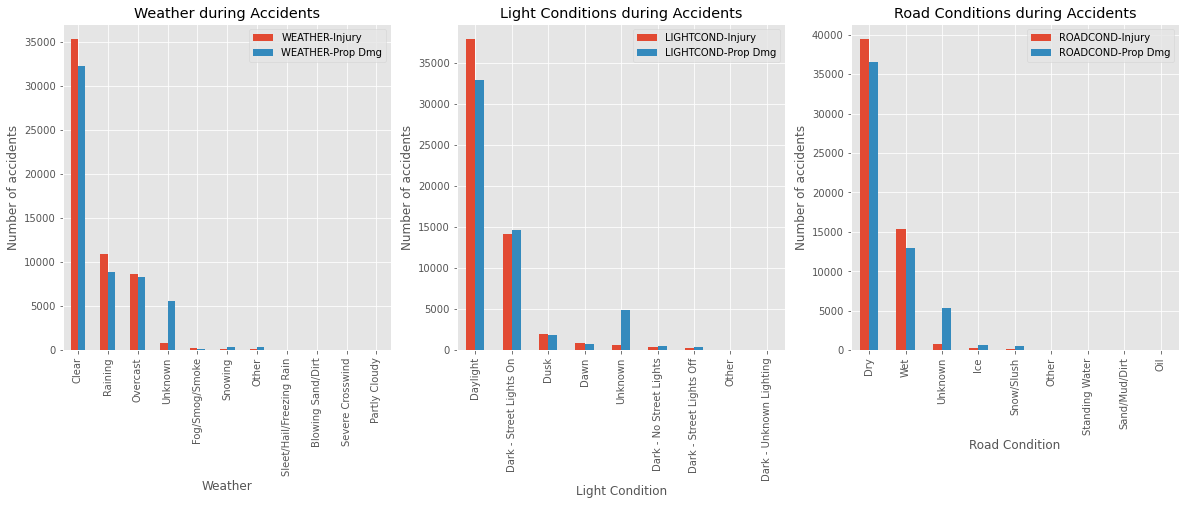

In [46]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2 = fig.add_subplot(1, 3, 3) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_wx.plot(kind='bar', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Weather during Accidents')
ax0.set_xlabel('Weather')
ax0.set_ylabel('Number of accidents')

# Subplot 2: Line plot
df_lt.plot(kind='bar', figsize=(20, 6), ax=ax1) # add to subplot 3
ax1.set_title ('Light Conditions during Accidents')
ax1.set_xlabel('Light Condition')
ax1.set_ylabel('Number of accidents')

# Subplot 3: Line plot
df_rd.plot(kind='bar', figsize=(20, 6), ax=ax2) # add to subplot 2
ax2.set_title ('Road Conditions during Accidents')
ax2.set_xlabel('Road Condition')
ax2.set_ylabel('Number of accidents')

plt.show()

## Lets try SVM with just the few independent variables we have so far, no balancing yet, and no normalization yet

- INATTENTIONIND
- UNDERINFL
- SPEEDING
- Clear
- Fog/Smog/Smoke
- other-weather
- Overcast
- Raining
- Sleet/Hail/Freezing Rain
- Snowing
- Dry
- Ice
- Snow/Slush
- Wet
- Dark - No Street Lights
- Dark - Street Lights Off
- Dark - Street Lights On
- Dark - Unknown Lighting
- Dawn
- Daylight
- Dusk
- Other-lightcond

In [47]:
feature_df = df_model[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Raining', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk']]
X = np.asarray(feature_df)
X[0:5]

array([[3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0],
       [4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0],
       [5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0]], dtype=int64)

In [48]:
feature_df

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,Clear,Fog/Smog/Smoke,Overcast,Raining,...,Ice,Snow/Slush,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,3,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,4,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22400,2,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
22401,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22402,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
22403,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
y = np.asarray(df_model['SEVERITYCODE'])
y [0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (17924, 23) (17924,)
Test set: (4481, 23) (4481,)


In [51]:
from sklearn import svm
alf = svm.SVC(kernel=kern)
alf.fit(X_train, y_train) 

SVC(kernel='sigmoid')

In [52]:
yhata = alf.predict(X_test)
yhata [0:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.48      0.57      0.52      2271
           1       0.45      0.36      0.40      2210

    accuracy                           0.47      4481
   macro avg       0.46      0.46      0.46      4481
weighted avg       0.46      0.47      0.46      4481

Normalized confusion matrix
[[0.57 0.43]
 [0.64 0.36]]


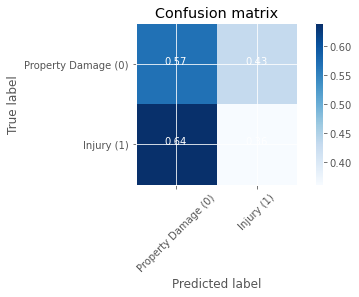

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhata, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhata))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (0)','Injury (1)'],normalize= True,  title='Confusion matrix')

In [55]:
f1_score(y_test, yhata, average='weighted') 

0.46040877674768854

In [56]:
jaccard_score(y_test, yhata)

0.24992160551897147

# Decision Tree

In [57]:
AccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
print(AccidentTree) # it shows the default parameters

fitAccidentTree = AccidentTree.fit(X_train, y_train)

predAccidentTree = AccidentTree.predict(X_test)

print (predAccidentTree [0:5])
print (y_test [0:5])

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predAccidentTree))

DecisionTreeClassifier(criterion='entropy', max_depth=4)
[1 0 0 0 0]
[0 0 1 1 0]
DecisionTrees's Accuracy:  0.6636911403704531


In [58]:
#filename = "Accidenttree.bmp"
#featureNames = feature_df.columns[:]
#targetNames = df_model['SEVERITYCODE'].unique().tolist()

#dot_data = tree.export_graphviz(AccidentTree, out_file=filename) 
#graph = graphviz.Source(dot_data) 
#graph.render("Accident") 

#dot_data = tree.export_graphviz(AccidentTree, out_file=None, feature_names=featureNames, class_names=targetNames, filled=True, rounded=True, special_characters=True)  
#graph = graphviz.Source(dot_data)  
#graph 

In [59]:
#r = export_text(fitAccidentTree, feature_names=featureNames)
#print(r)

In [60]:
#dot_data = StringIO()

#featureNames = feature_df.columns[:]
#TargetNames = df_model['SEVERITYCODE'].unique().tolist()

# Here we are visualizing the model based on the test dataset (drugTree)
#out=tree.export_graphviz(AccidentTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)

# Not sure why we can't visualize the prediction based on the test dataset (predTree), but there is an error
#out=tree.export_graphviz(predTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_testset), filled=True,  special_characters=True,rotate=False)  

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)

#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

# Re-run model test with Full Unbalanced Dataset as X_test and y_test

In [61]:
feature_df = df[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Raining', 'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk']]
X = np.asarray(feature_df)
X[0:5]

array([[2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0],
       [4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0]], dtype=int64)

In [62]:
y_test = np.asarray(df['SEVERITYCODE'])
y_test [0:5]

array([1, 0, 0, 0, 1], dtype=int64)

In [63]:
yhata = alf.predict(X)
yhata [0:5]

array([1, 1, 0, 0, 1], dtype=int64)

              precision    recall  f1-score   support

           0       0.67      0.57      0.62    128154
           1       0.27      0.36      0.31     56013

    accuracy                           0.51    184167
   macro avg       0.47      0.46      0.46    184167
weighted avg       0.55      0.51      0.52    184167

Normalized confusion matrix
[[0.57 0.43]
 [0.64 0.36]]


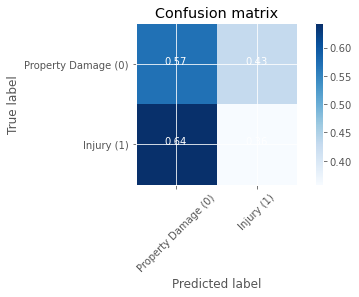

In [64]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhata, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhata))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage (0)','Injury (1)'],normalize= True,  title='Confusion matrix')

In [65]:
f1_score(y_test, yhata, average='weighted') 

0.521599559427459

In [66]:
jaccard_score(y_test, yhata)

0.18019948149215037

In [67]:
predAccidentTree = AccidentTree.predict(X)

print (predAccidentTree [0:5])
print (y_test [0:5])

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predAccidentTree))

[0 0 1 1 0]
[1 0 0 0 1]
DecisionTrees's Accuracy:  0.667236801381355
